### Descrizione da decidere

# Value at Risk (VaR) and Expected Shortfall (ES)

In quantitative risk management, two widely used measures to assess market risk are the **Value at Risk (VaR)** and the **Expected Shortfall (ES)** (also known as Conditional Value at Risk or CVaR).

## Value at Risk (VaR)

The Value at Risk at confidence level $\alpha$ (e.g., 95% or 99%) is defined as the maximum expected loss over a given time horizon such that the probability of a loss exceeding this value is no more than $(1 - \alpha)$.

Mathematically, for a portfolio loss variable $L$:
$$
\text{VaR}_{\alpha}(L) = \inf \{ \ell \in \mathbb{R} \,:\, \mathbb{P}(L \leq \ell) \geq \alpha \}
$$

This is equivalent to the $\alpha$-quantile of the loss distribution:
$$
\text{VaR}_{\alpha}(L) = F_L^{-1}(\alpha)
$$
where $F_L$ is the cumulative distribution function of $L$.

## Expected Shortfall (ES)

The Expected Shortfall at level $\alpha$ measures the expected loss given that the loss exceeds the VaR. It is a coherent risk measure, meaning it satisfies properties like subadditivity and positive homogeneity.

Formally:
$$
\text{ES}_{\alpha}(L) = \mathbb{E}[L \mid L > \text{VaR}_{\alpha}(L)]
$$

or equivalently (assuming a continuous loss distribution):
$$
\text{ES}_{\alpha}(L) = \frac{1}{1 - \alpha} \int_{\alpha}^{1} \text{VaR}_{u}(L) \, du
$$

## Interpretation

- $\text{VaR}_{\alpha}$ tells us: "We do not expect to lose more than this amount with probability $\alpha$."
- $\text{ES}_{\alpha}$ tells us: "If we do lose more than $\text{VaR}_{\alpha}$, the average loss will be $\text{ES}_{\alpha}$."

## Application

In this notebook, we:
- Estimate historical and parametric VaR and ES based on financial return data.
- Use fitted GARCH models to forecast future volatility and compute risk measures.
- Compare the results under normal and Student-t distributional assumptions.
nd Student-t distributional assumptions.


In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
from functions import * 

In [32]:
# Let's price a European call  option with 1 year of maturity
r = 0
sigma = .2
S0 = 4
K = 4 
q = 0
T = 1 

C = Eurocall_Black_Scholes(S0, K, r, q, sigma, T)

print(f'Call price:\t{C:.4f}')

Call price:	0.3186


In [33]:
# Let's find the distribution 6 months ahead of the underlying

T1 = .5
n_steps = int(.5 * 252)

St = simulate_gbm(S0, r, q, sigma, T, n_steps, N=15)

In [34]:
# Now let's evaluate the the option for the residual time to maturity

Calls = Eurocall_Black_Scholes(St[-1], K, r, q, sigma, T-T1)

In [35]:
Calls

array([0.2742929 , 0.9161716 , 0.61641689, ..., 0.11912215, 0.00932642,
       0.06248995])

In [41]:
# Let's suppose we have a long position in call 
# Let's define our loss as the difference between the price at six month and the present one 

loss = -(Calls - C)/C


In [42]:
loss

array([ 0.13912945, -1.87541221, -0.93462957, ...,  0.62613413,
        0.97072896,  0.80387476])

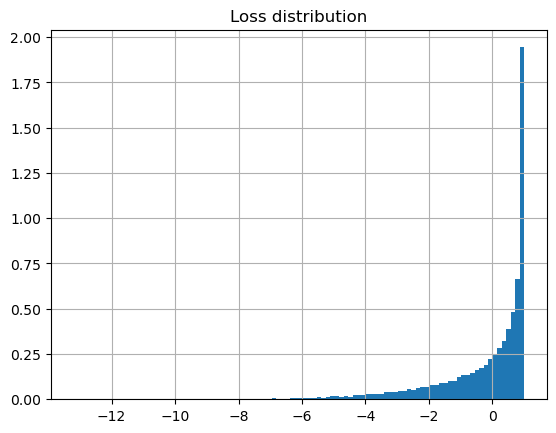

In [43]:
### Let's plot the distribution of the loss 

plt.hist(loss, bins=100, density=True)
plt.title('Loss distribution')
plt.grid()
plt.show()

In [44]:
# Let's compute the quantiles 

q05 = np.quantile(loss, .95)
q025 = np.quantile(loss, .975)
q01 = np.quantile(loss, .99)

print(f"VaR 5%: {q05}")
print(f"VaR 2.5%: {q025}")
print(f"VaR 1%: {q01}")

VaR 5%: 0.9966468948322635
VaR 2.5%: 0.9991659929865486
VaR 1%: 0.9998806423646364


In [45]:
ES05 = np.mean(loss[loss>q05])
ES025 = np.mean(loss[loss>q025])
ES01 = np.mean(loss[loss>q01])

print(f"ES 5%: {ES05}")
print(f"ES 2.5%: {ES025}")
print(f"ES 1%: {ES01}")

ES 5%: 0.9988903559379809
ES 2.5%: 0.9997410213807058
ES 1%: 0.9999618259991097
